
# Ethical Implications

## 1. Lending and Discrimination

The [Equal Credit Opportunity Act (ECOA)](https://www.consumer.ftc.gov/articles/0347-your-equal-credit-opportunity-rights) is a federal law that prohibits lending entities (both institutions and people) from discriminating "on the basis of race, color, religion, national origin, sex, marital status, age," or because the prospective borrower receives public assistance. Lenders are, however, permitted to consider an applicant's "income, expenses, debts, and credit history" in evaluating the applicant's probability of repaying the debt to decide whether to accept or reject loan applications and to determine loan terms. Nevertheless, differential treatment by race, color, religion, national origin, sex, etc can still arise even when an institution or person is not explicitly discriminating based on those characteristics. Thus, we want to assess whether we see evidence of discrimination in LendingClub's acceptances and rejections of loan applications or in the terms it sets for accepted loans. In addition, we want to evaluate whether our proposed investing strategy results in differential treatment.

## 2. Literature Review

To inform our approach, we surveyed existing research of how predictive algorithms can result in discrimination and methods for addressing it.

**2A. Sweeney, L. "Discrimination in Online Ad Delivery". Communications of the ACM, May 2013, Vol. 56 No. 5, Pages 44-54.**

Sweeney's research presents evidence of discrimination in ad delivery on Google.com and Reuters.com on the basis of racially associated names. Using a chi-squared analysis, Sweeney found that running a search on a black-associated name was 25% more likely to get arrested-related ads compared to running a search on a white-associated name. All names used in the study were the full names of real people, roughly evenly split between professionals and "netizens" (i.e. people active on the internet - social media and blogs), and about one-third black and two-thirds white.

While disentangling the root cause of the discrimination fell outside the scope of the study, Sweeney's research clearly showcases the need to actively evaluate possibly unintended societal implications of the algorithms we put in place.

**2B. Datta, A., Tschantz, M.C., and Datta, A. "Automated Experiments on Ad Privacy Settings: A Tale of Opacity, Choice, and Discrimination". Proceedings on Privacy Enhancing Technologies 2015; 2015 (1):92–112.**

Datta et al. found evidence of gender discimination in employment-related searches by experimentally manipulating whether a simulated user specified male or female in Google's ad settings. Their results revealed that simulated male users were shown ads regarding coaching for high-paying careers more often than they were shown to simulated female users. They collected the ads results of 1000 simulated users - half male and half female - and trained a classifier predicting gender using the ad URLs and titles as the feature set. Their classifier used a 90-10 train-test split, and achieved 93% accuracy on the test set. The high predictive power of the classifier suggests gender discrimination in Google's employment-related ad results, and such discrimination can exacerbate the current gender pay gap.

With limited visibility into the details of Google's ad vending algorithm, the authors of this paper were also unable to isolate the mechanisms through which the discrimination is arising. But again, like Sweeney's research, it demonstrates algorithms, while not inherently subjective, can be discriminatory as well.

**2C. Angwin, J., Larson, J., Mattu, S., and Kirchner, L. "Machine Bias". ProPublica. May 23, 2016.**

In an article published on ProPublica, the authors found that COMPAS (Correctional Offender Management Profiling for Alternative Sanctions), one of the nation's most popular tools in criminal risk assessment, discriminates unfavorably toward black defendants but favorably toward white defendants. Although the prediction accuracy was about the same as the overall accuracy (61%) in both groups, COMPAS makes a systematically different kind of error depending on the defendant's race group. Specifically, black defendants were twice as likely as black defendants to fall victim to a false positive result, i.e. they did not reoffend within the next two years but were wrongly labelled as highly likely to reoffend (i.e. high risk). On the other hand, white defendants were twice as likely as black defendants to receive a false negative assessment, i.e. they did reoffend within the next two years but were incorrectly labelled as not very likely to reoffend (i.e. low risk). Using a logistic regression model, Angwin et al. found that bias against black defendants in COMPAS's predictions (higher risk scores) remains even after controlling for age, criminal history, future (actual) recidivism, charge degree, and gender.

## 3. Census Data Summary

Especially when machine-generated predictions carry significant life consequences, developers and scientists have a responsibility to ensure their algorithms do not create or exacerbate societal problems through disparate outcomes and impacts on different groups.

While LendingClub does not have the demographic data associated with each loan or loan application (either they don't collect it or they just don't make it publicly available), LendingClub does share the 3-digit zip codes of the borrowers and applicants. We leveraged these zip codes to tie high-level demographic information to the loan data.

After data processing (as described previously in the [Data Description](https://cs109group67.github.io/lendingclub/DataDescription.html) section), there are five records with missing data, likely originating from sparsely populated zip code areas. At least one 3-digit zip code area has a recorded population of zero. On average, the population is ~350k, with a household size of ~2.6 and a median income of $55k. For the average zip code area, the population is about evenly split between male and female, with the majority of the population White and having at least a High School education. (See **Table 1** below.)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#formatting
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

#import statements
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#read in the census data
census_df = pd.read_csv("data/census_data_clean_new.csv", index_col=False)

**Table 1. Selected Summary Statistics for Census Data**

In [4]:
#summarize census data
pd.set_option('float_format', '{:f}'.format)
census_df[['Population', 'Household_size', 'Avg_median_household_inc', 'Male_pct', 'White_pct', 'No_Diploma_pct']].describe()

Population  Household_size  Avg_median_household_inc   Male_pct  \
count     891.000000      886.000000                886.000000 886.000000   
mean   357514.425365        2.657810              54876.389742  49.533976   
std    391271.361292        0.306602              16378.655265   1.806755   
min         0.000000        1.960550              10039.113879  42.618155   
25%    116037.500000        2.493136              44655.485670  48.773422   
50%    217838.000000        2.611310              51368.147218  49.374504   
75%    451807.000000        2.761605              61534.292170  50.041174   
max   3105203.000000        8.104651             184414.729328  88.256228   

       White_pct  No_Diploma_pct  
count 886.000000      885.000000  
mean   71.255064       12.865526  
std    20.720257        5.511241  
min     2.420546        0.873224  
25%    58.467006        8.968413  
50%    75.983965       11.838107  
75%    89.283953       15.580997  
max    97.704745       38.063859

## 4. Exploratory Data Analysis

Leveraging zip codes, we explored whether there were demographic differences between loans that LendingClub accepted or rejected for its marketplace. We looked at the distributions of acceptances and rejections by demographic groups, on the basis of which federal law prohibits discrimination, in terms of both population count and as a percentage of the total population.

Visually, our exploratory data analysis did not suggest discrimination in either loan status or the grade assigned to issued loans. Between different sexes, races, household structures, and educational attainments, there was not a significant difference between either the accept-reject decision of loan applications or the resulting loan grade of the issued loans, as suggested by the large overlap in the histograms and boxplots in **Figures 1-5**.

In [5]:
#read in the loan data for accepted loans
loan_stats_df = pd.read_hdf("data/ls_keepzip.h5", "ls_keepzip")

In [6]:
#some processing of the accepted loan data
loan_cols_to_keep = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
                'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
                'zip_code', 'dti']
accepted_df = loan_stats_df[loan_cols_to_keep]
accepted_df['accepted'] = 1

In [7]:
#read in the loan data for rejected loans
reject_stats_df = pd.read_pickle("data/RejectStats_clean.pkl")

In [8]:
#some processing of the rejected loan data
reject_cols_to_keep = ['Amount Requested', 'Risk_Score', 'Debt-To-Income Ratio', 'Zip Code', 'Employment Length']
rejected_df = reject_stats_df[reject_cols_to_keep]
rejected_df = rejected_df.rename(index=str, columns={"Amount Requested": "loan_amnt", 
                                                             "Risk_Score": "risk_score", 
                                                             "Debt-To-Income Ratio": "dti", 
                                                             "Zip Code": "zip_code", 
                                                             "Employment Length": "emp_length"})
rejected_df['dti'] = rejected_df['dti'].apply(lambda x: float(x[:-1]))
rejected_df['emp_length'].replace(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', 
                                 '7 years', '8 years', '9 years', '10+ years'], 
                                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                                inplace=True)
rejected_df['accepted'] = 0

In [9]:
#take a random sample of rejected_df of same size as accepted_df, as rejected_df is too large
rand_ind = np.random.choice(rejected_df.shape[0], accepted_df.shape[0], replace=False)
sample_rejected_df = rejected_df.iloc[rand_ind]

In [10]:
#Subset the common columns between the Loan Stats and Reject Stats (sample) datasets and combine
common_cols = ['loan_amnt', 'dti', 'zip_code', 'emp_length', 'accepted']
loan_df = accepted_df[common_cols].append(sample_rejected_df[common_cols])

In [11]:
#join loan data with census data by zip code
#use left join so that none of the loan records are dropped
loan_df = loan_df.rename(index=str, columns={"zip_code": "Zip"})
joined_df = pd.merge(loan_df,census_df, on='Zip', how='left')

In [12]:
#variable lists
level_vars = ['Population', 'Avg_median_household_inc', 'Households', 'Housing_Units']
race_vars_pct = ['White_pct', 'Black_pct', 'Native_pct', 'Asian_pct', 'Islander_pct', 'Other_pct', 'Two_pct', 'Hispanic_pct']
race_vars_count = ['White', 'Black', 'Native', 'Asian', 'Islander', 'Other', 'Two', 'Hispanic']
sex_vars_pct = ['Female_pct', 'Male_pct']
sex_vars_count = ['Female', 'Male']
education_vars = ['No_Diploma_pct', 'High_School_pct', 'Some_College_pct', 
                  'Bachelors_Degree_pct', 'Graduate_Degree_pct']
household_vars_pct = ['Families_pct', 'Non_families_pct', 'Married_couple_families_pct','Single_parent_families_pct']
household_vars_count = ['Families', 'Non_families', 'Married_couple_families', 'Single_parent_families']

In [13]:
#function to plot histograms by accept/reject
def plot_acc_rej(var_list, figwidth, figheight):
    fig, axs = plt.subplots(int(np.ceil(len(var_list)/2)),2, figsize=(figwidth,figheight))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plot_list = axs.ravel()

    for i in np.arange(len(var_list)):
        rej_data = joined_df[joined_df['accepted']==0][var_list[i]]
        plot_list[i].hist(rej_data.dropna(), alpha=0.5, label='Rejected')
        
        acc_data = joined_df[joined_df['accepted']==1][var_list[i]]
        plot_list[i].hist(acc_data.dropna(), alpha=0.5, label='Accepted')

        plot_list[i].set_title("Histogram of {} by Loan Application Status".format(var_list[i]))
        plot_list[i].legend(loc='best')


    plt.show()

**Figure 1. Distributions of Loan Acceptances and Rejections by Populousness and Income**

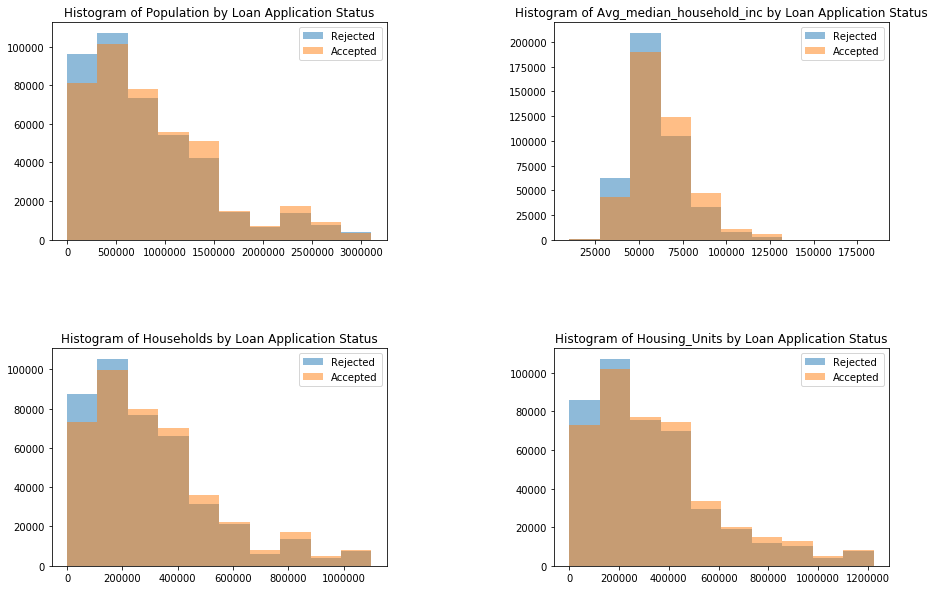

In [14]:
plot_acc_rej(level_vars, 15, 10)

Looking at the distributions of acceptances versus rejections by Population size, count of Households, and count of Housing Units, we observe a slight favoring of more populous areas for loan acceptances. Unsurprisingly, we also see that compared to the rejected loans, the accepted loans came from applicants in areas with higher median income.

**Figure 2A. Histograms: Distributions of Loan Acceptances and Rejections by Sex (Count and Percent of Total Population)**

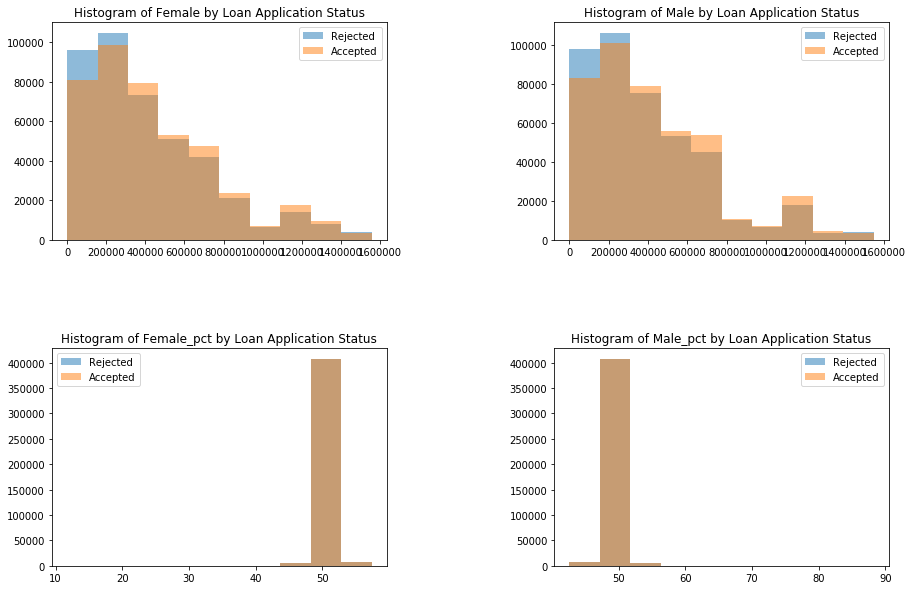

In [15]:
plot_acc_rej(sex_vars_count+sex_vars_pct, 15, 10)

**Figure 2B. Boxplots: Distributions of Loan Acceptances and Rejections by Sex (Count and Percent of Total Population)**

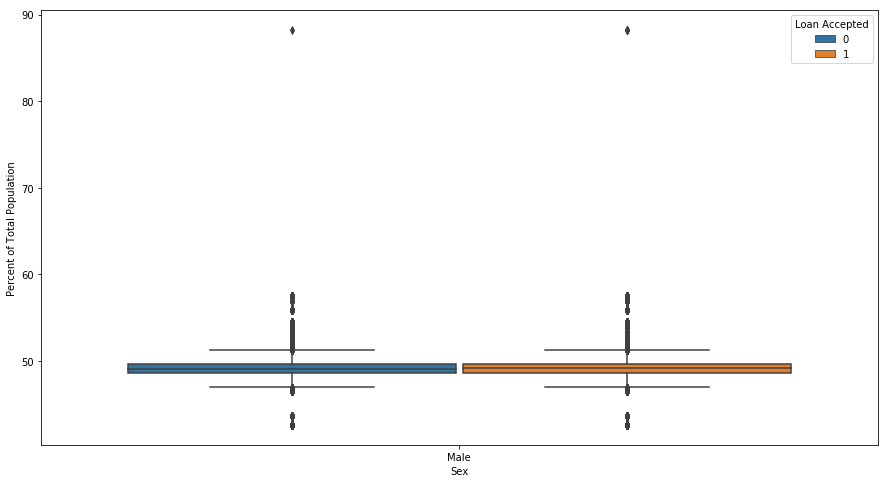

In [16]:
sex_df = pd.melt(joined_df[['Male_pct', 'accepted']].rename(index=str, columns={"Male_pct": "Male", "accepted": "Loan Accepted"}), 
        id_vars=['Loan Accepted'], value_vars=['Male'], 
        var_name='Sex', value_name='Percent of Total Population')
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Sex", y="Percent of Total Population", data=sex_df, hue="Loan Accepted")

**Figure 3A. Histograms: Distributions of Loan Acceptances and Rejections by Race (Count and Percent of Total Population)**

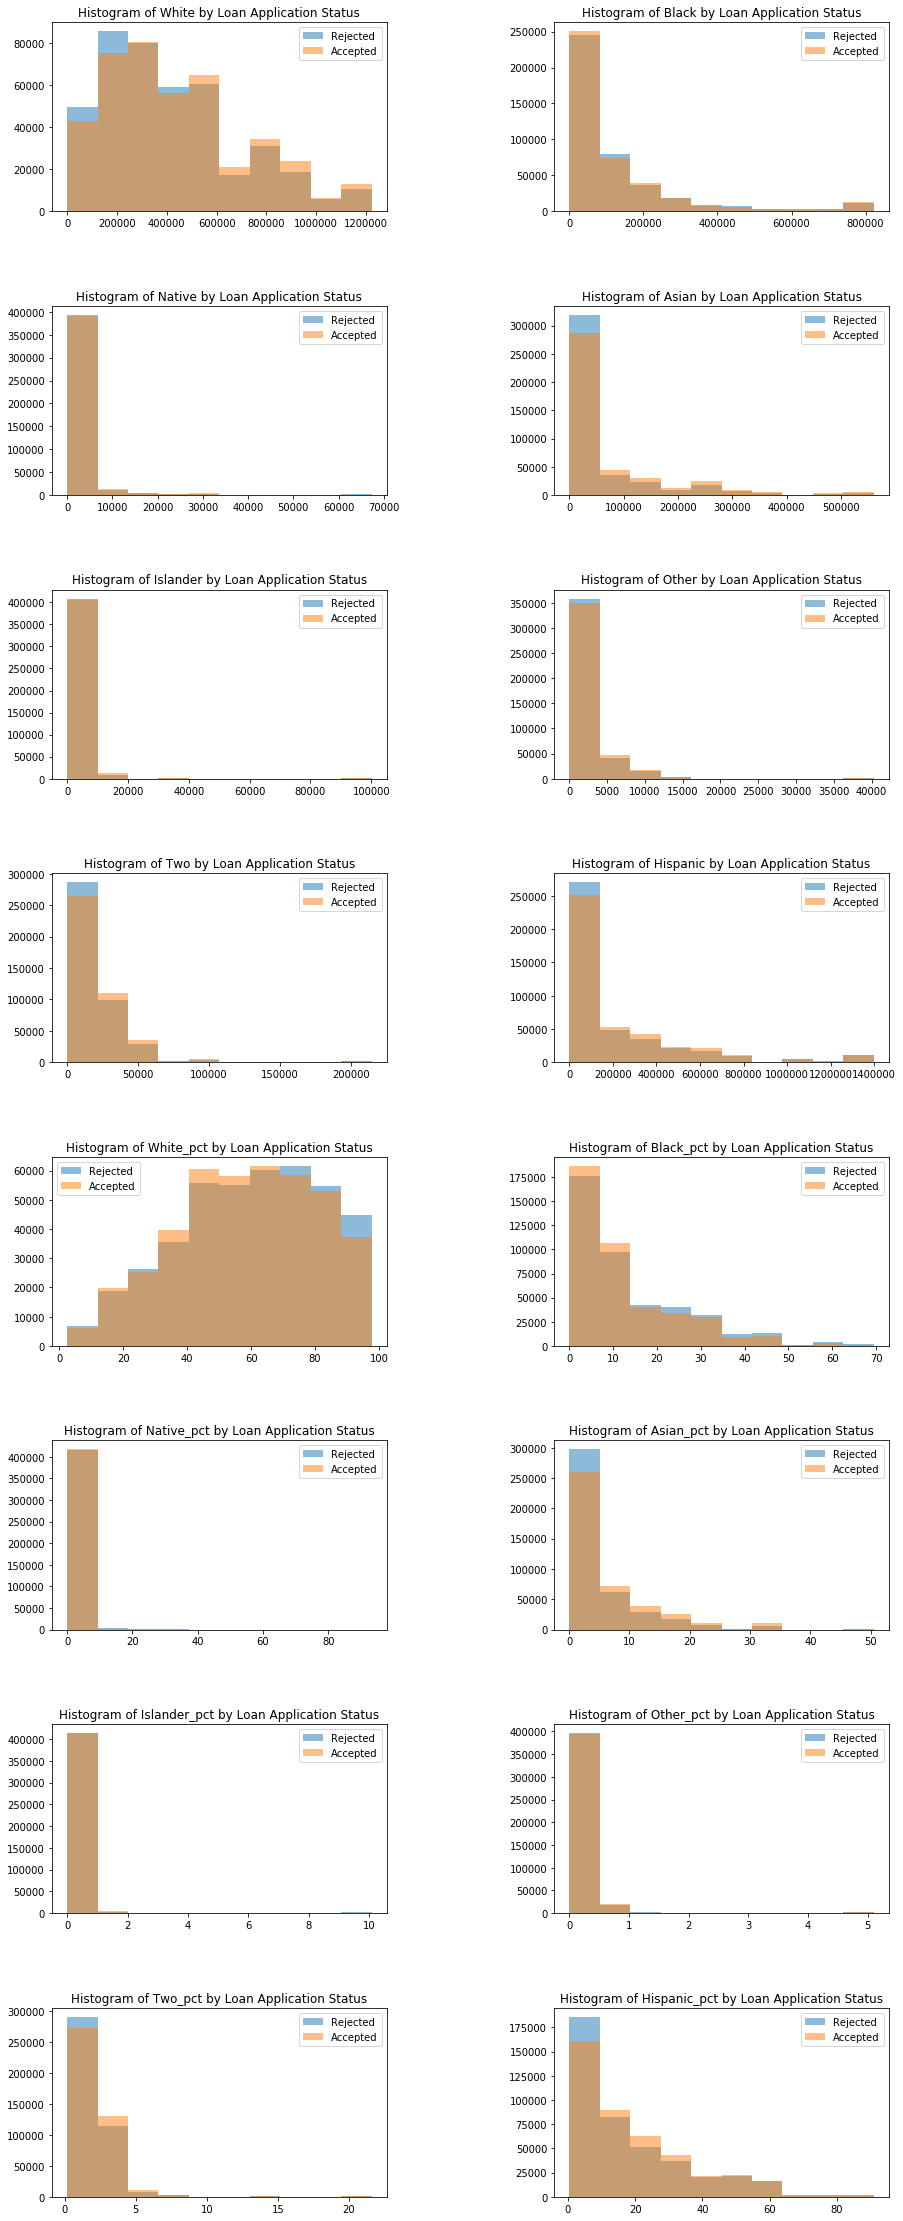

In [17]:
plot_acc_rej(race_vars_count+race_vars_pct, 15, 40)

**Figure 3B. Boxplots: Distributions of Loan Acceptances and Rejections by Race (Count and Percent of Total Population)**

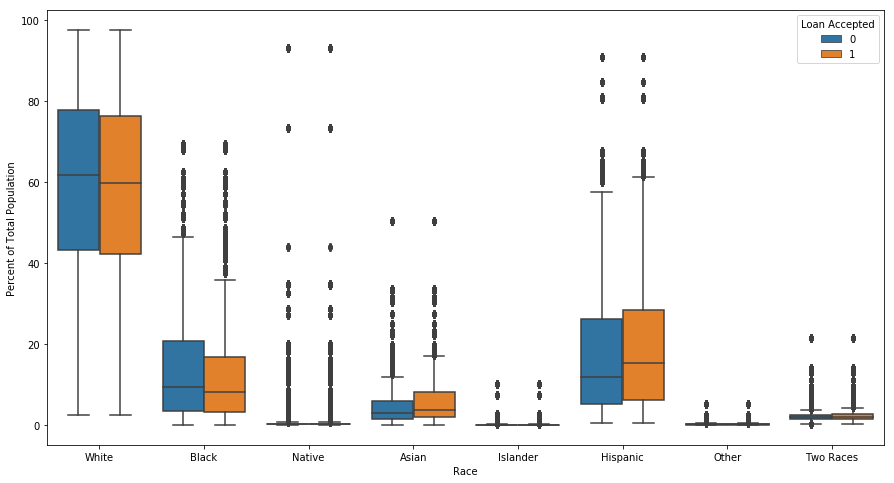

In [18]:
race_df = pd.melt(joined_df[race_vars_pct + ['accepted']].rename(index=str, 
                                           columns={"White_pct": "White", 
                                                    "Black_pct": "Black", 
                                                    "Native_pct": "Native", 
                                                    "Asian_pct": "Asian", 
                                                    "Islander_pct": "Islander", 
                                                    "Hispanic_pct": "Hispanic",
                                                    "Other_pct": "Other", 
                                                    "Two_pct": "Two Races", 
                                                    "accepted": "Loan Accepted"}),
        id_vars=['Loan Accepted'], value_vars=['White', 'Black', 'Native', 'Asian', 'Islander', 'Hispanic', 'Other', 'Two Races'], 
        var_name='Race', value_name='Percent of Total Population')  
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Race", y="Percent of Total Population", data=race_df, hue="Loan Accepted")

**Figure 4A. Histograms: Distributions of Loan Acceptances and Rejections by Household Structure and Marital Status (Count and Percent of Total Population)**

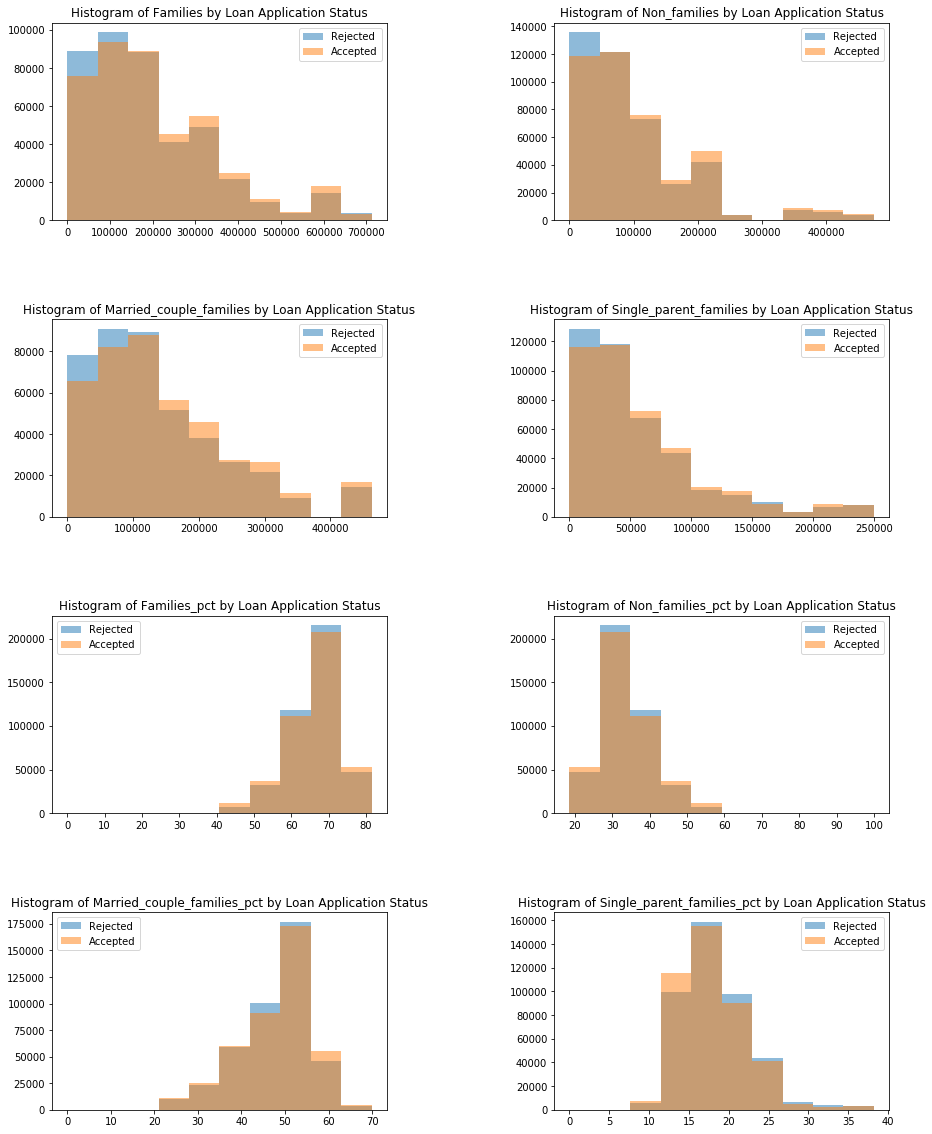

In [19]:
plot_acc_rej(household_vars_count+household_vars_pct, 15, 20)

**Figure 4B. Boxplots: Distributions of Loan Acceptances and Rejections by Household Structure and Marital Status (Count and Percent of Total Population)**

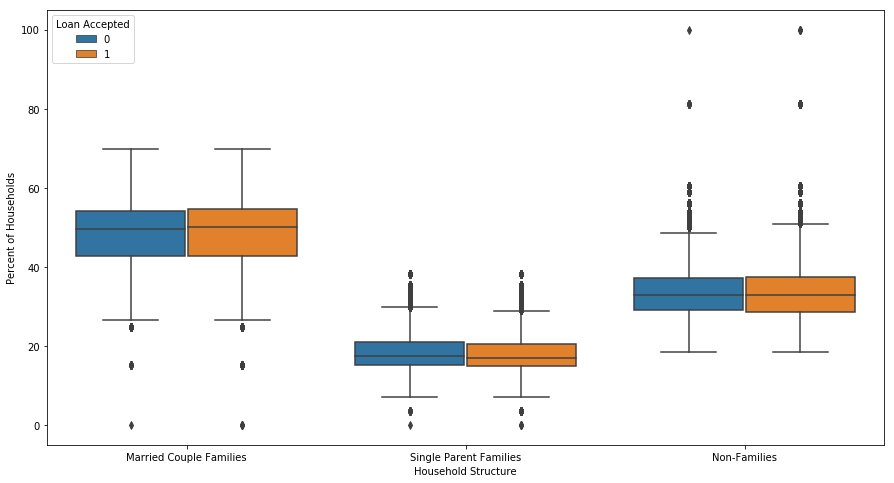

In [20]:
household_df = pd.melt(joined_df[['Married_couple_families_pct', 'Single_parent_families_pct', 'Non_families_pct', 'accepted']].rename(index=str, 
                                           columns={"Married_couple_families_pct": "Married Couple Families", 
                                                    "Single_parent_families_pct": "Single Parent Families", 
                                                    "Non_families_pct": "Non-Families", 
                                                    "accepted": "Loan Accepted"}),
        id_vars=['Loan Accepted'], value_vars=['Married Couple Families', 'Single Parent Families', 'Non-Families'], 
        var_name='Household Structure', value_name='Percent of Households') 
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Household Structure", y="Percent of Households", data=household_df, hue="Loan Accepted")

**Figure 5. Boxplots: Distributions of Loan Acceptances and Rejections by Educational Attainment (Count and Percent of Total Population)**

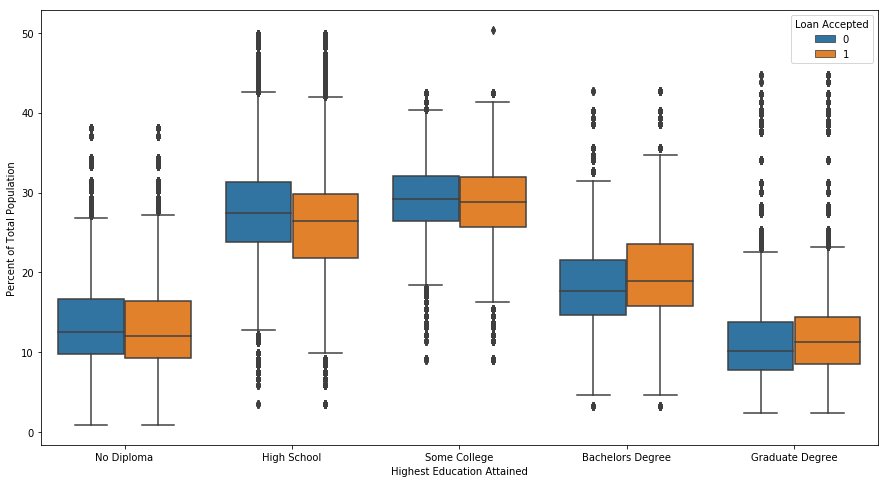

In [21]:
education_df = pd.melt(joined_df[education_vars + ['accepted']].rename(index=str, 
                                           columns={"No_Diploma_pct": "No Diploma", 
                                                    "High_School_pct": "High School", 
                                                    "Some_College_pct": "Some College", 
                                                    "Bachelors_Degree_pct": "Bachelors Degree", 
                                                    "Graduate_Degree_pct": "Graduate Degree", 
                                                    "accepted": "Loan Accepted"}),
        id_vars=['Loan Accepted'], value_vars=['No Diploma', 'High School', 'Some College', 'Bachelors Degree', 'Graduate Degree'], 
        var_name='Highest Education Attained', value_name='Percent of Total Population')      
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Highest Education Attained", y="Percent of Total Population", data=education_df, hue="Loan Accepted")

Further, of the loans that were accepted, we checked to see if there were noticeable differences in assigned loan grade by demographic groups. Loan grade will influence the interest rate the borrower is charged and whether or not investors want to fund the loan. Again, the data visualizations did not suggest discrimination. (See **Figures 6-9** below.)

In [22]:
#join accepted loan data with census data by zip code
accepted_df = accepted_df.rename(index=str, columns={"zip_code": "Zip"})
accepted_joined_df = pd.merge(accepted_df,census_df, on='Zip', how='left')

**Figure 6A. Distributions of Loan Grade by Sex (Percent of Total Population)**

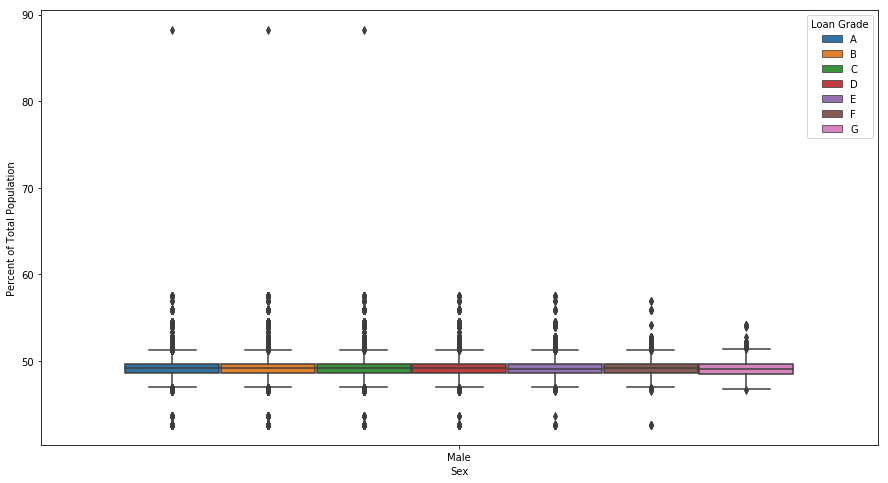

In [23]:
sgrade_df = pd.melt(accepted_joined_df[['Male_pct','grade']].rename(index=str, columns={"Male_pct": "Male", "grade": "Loan Grade"}), 
        id_vars=['Loan Grade'], value_vars=['Male'], 
        var_name='Sex', value_name='Percent of Total Population')
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Sex", y="Percent of Total Population", data=sgrade_df, hue="Loan Grade",
                hue_order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

**Figure 6B. Distributions of Loan Grade by Sex (Population Count)**

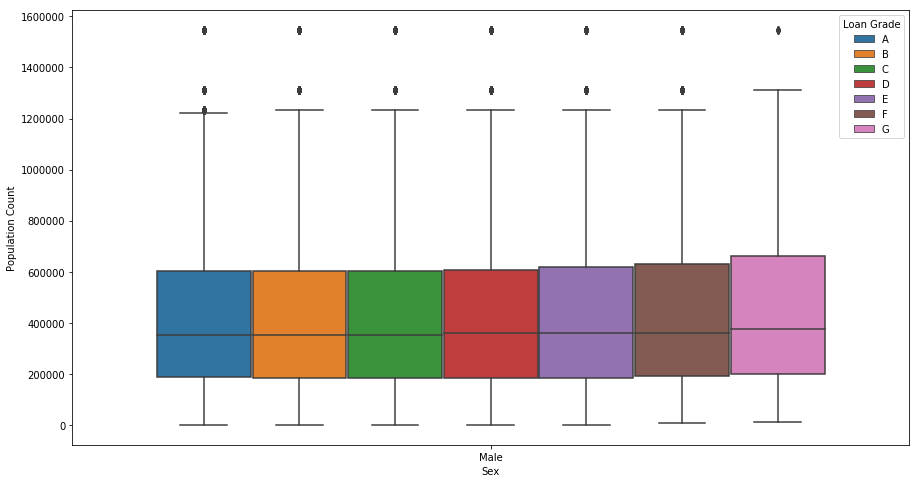

In [24]:
scgrade_df = pd.melt(accepted_joined_df[['Male','grade']].rename(index=str, columns={"Male": "Male", "grade": "Loan Grade"}), 
        id_vars=['Loan Grade'], value_vars=['Male'], 
        var_name='Sex', value_name='Population Count')
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Sex", y="Population Count", data=scgrade_df, hue="Loan Grade",
                hue_order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

**Figure 7A. Distributions of Loan Grade by Race (Percent of Total Population)**

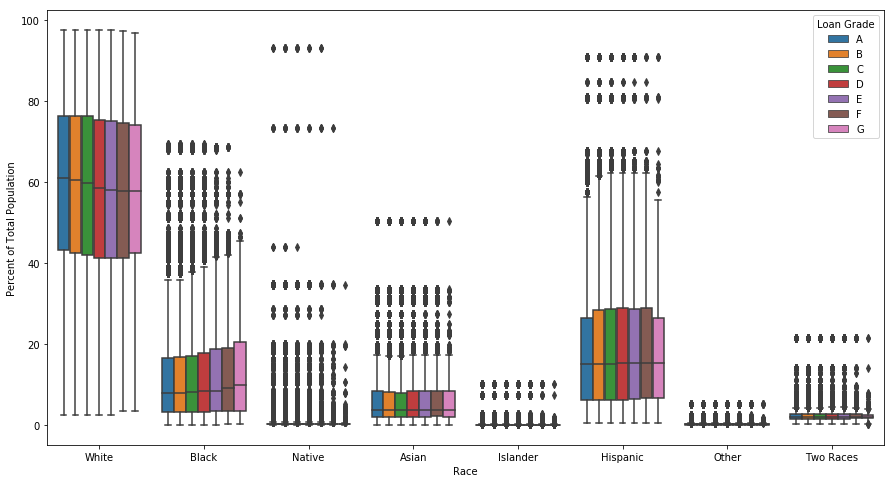

In [25]:
rgrade_df = pd.melt(accepted_joined_df[race_vars_pct + ['grade']].rename(index=str, 
                                           columns={"White_pct": "White", 
                                                    "Black_pct": "Black", 
                                                    "Native_pct": "Native", 
                                                    "Asian_pct": "Asian", 
                                                    "Islander_pct": "Islander", 
                                                    "Hispanic_pct": "Hispanic",
                                                    "Other_pct": "Other", 
                                                    "Two_pct": "Two Races", 
                                                    "grade": "Loan Grade"}),
        id_vars=['Loan Grade'], value_vars=['White', 'Black', 'Native', 'Asian', 'Islander', 'Hispanic', 'Other', 'Two Races'], 
        var_name='Race', value_name='Percent of Total Population')       
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Race", y="Percent of Total Population", data=rgrade_df, hue="Loan Grade",
                hue_order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

**Figure 7B. Distributions of Loan Grade by Race (Population Count)**

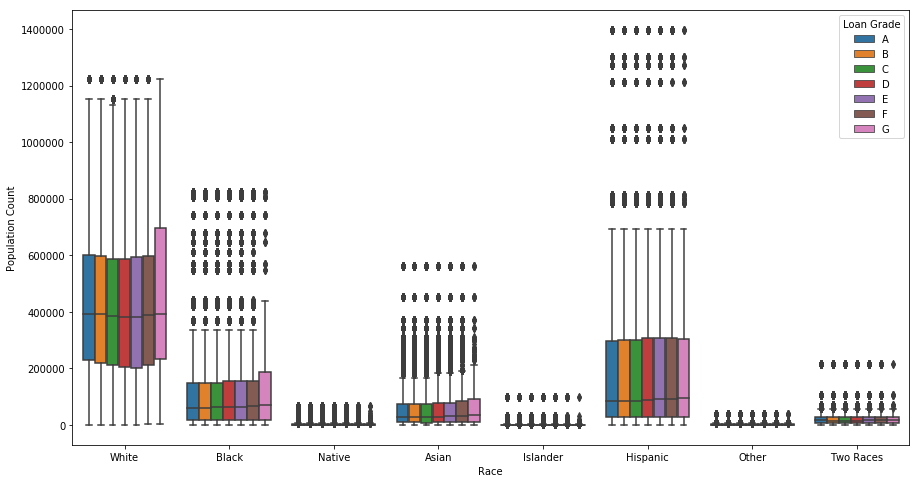

In [26]:
rcgrade_df = pd.melt(accepted_joined_df[race_vars_count + ['grade']].rename(index=str, 
                                           columns={"White": "White", 
                                                    "Black": "Black", 
                                                    "Native": "Native", 
                                                    "Asian": "Asian", 
                                                    "Islander": "Islander", 
                                                    "Hispanic": "Hispanic",
                                                    "Other": "Other", 
                                                    "Two": "Two Races", 
                                                    "grade": "Loan Grade"}),
        id_vars=['Loan Grade'], value_vars=['White', 'Black', 'Native', 'Asian', 'Islander', 'Hispanic', 'Other', 'Two Races'], 
        var_name='Race', value_name='Population Count')       
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Race", y="Population Count", data=rcgrade_df, hue="Loan Grade",
                hue_order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

**Figure 8A. Distributions of Loan Grade by Household Structure and Marital Status (Percent of Total Households)**

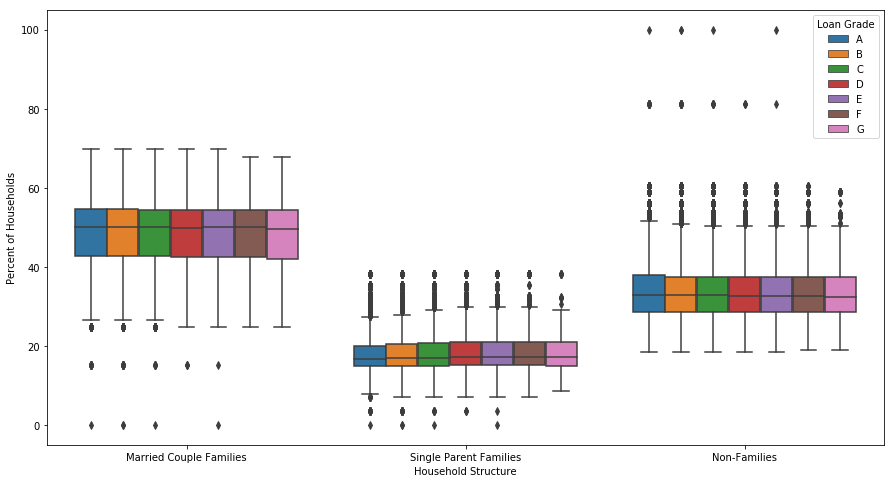

In [27]:
hgrade_df = pd.melt(accepted_joined_df[['Married_couple_families_pct', 'Single_parent_families_pct', 'Non_families_pct', 'grade']].rename(index=str, 
                                           columns={"Married_couple_families_pct": "Married Couple Families", 
                                                    "Single_parent_families_pct": "Single Parent Families", 
                                                    "Non_families_pct": "Non-Families", 
                                                    "grade": "Loan Grade"}),
        id_vars=['Loan Grade'], value_vars=['Married Couple Families', 'Single Parent Families', 'Non-Families'], 
        var_name='Household Structure', value_name='Percent of Households') 
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Household Structure", y="Percent of Households", data=hgrade_df, hue="Loan Grade",
                hue_order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

**Figure 8B. Distributions of Loan Grade by Household Structure and Marital Status (Household Count)**

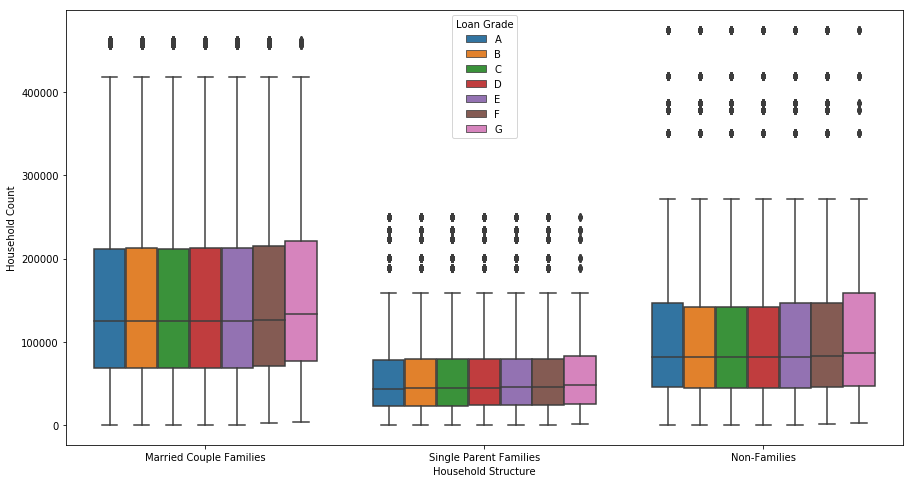

In [28]:
hcgrade_df = pd.melt(accepted_joined_df[['Married_couple_families', 'Single_parent_families', 'Non_families', 'grade']].rename(index=str, 
                                           columns={"Married_couple_families": "Married Couple Families", 
                                                    "Single_parent_families": "Single Parent Families", 
                                                    "Non_families": "Non-Families", 
                                                    "grade": "Loan Grade"}),
        id_vars=['Loan Grade'], value_vars=['Married Couple Families', 'Single Parent Families', 'Non-Families'], 
        var_name='Household Structure', value_name='Household Count') 
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Household Structure", y="Household Count", data=hcgrade_df, hue="Loan Grade",
                hue_order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

**Figure 9. Distributions of Loan Grade by Educational Attainment (Percent of Total Population)**

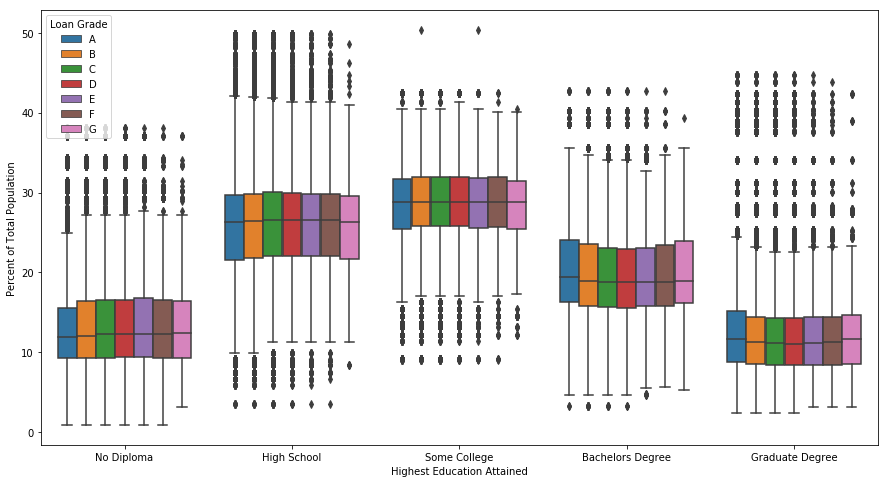

In [29]:
egrade_df = pd.melt(accepted_joined_df[education_vars + ['grade']].rename(index=str, 
                                           columns={"No_Diploma_pct": "No Diploma", 
                                                    "High_School_pct": "High School", 
                                                    "Some_College_pct": "Some College", 
                                                    "Bachelors_Degree_pct": "Bachelors Degree", 
                                                    "Graduate_Degree_pct": "Graduate Degree", 
                                                    "grade": "Loan Grade"}),
        id_vars=['Loan Grade'], value_vars=['No Diploma', 'High School', 'Some College', 'Bachelors Degree', 'Graduate Degree'], 
        var_name='Highest Education Attained', value_name='Percent of Total Population') 
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Highest Education Attained", y="Percent of Total Population", data=egrade_df, hue="Loan Grade",
                hue_order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
ax.legend(title="Loan Grade", loc='upper left')
plt.show()

Going forward in the modelling, we chose to focus on the demographic measures as a percentage of the total population, because demographic information by zip code gets muddled by how populous the zip code is when using population counts. As we can see in the histograms in **Figures 1-4**, using counts makes the acceptance distributions slightly to the right of the rejection distributions for all demographic groups because accepted loans tended to come from more populous zip codes as shown in **Figure 1**, in the distributions by Population size.

## 5. Modelling

In [30]:
#leave 'accepted' as the response variable
rf_predictors = ['loan_amnt',
 'dti',
 'emp_length',
 'Population',
 'Households',
 'No_Diploma_pct',
 'High_School_pct',
 'Some_College_pct',
 'Bachelors_Degree_pct',
 'Graduate_Degree_pct',
 'Family_Poverty_pct',
 'Unemployment_Rate_pct',
 'Housing_Units',
 'Avg_median_household_inc',
 'White_pct',
 'Black_pct',
 'Native_pct',
 'Asian_pct',
 'Islander_pct',
 'Other_pct',
 'Two_pct',
 'Hispanic_pct',
 'Female_pct',
 'Male_pct',
 'Less_than_24999_pct',
 'From_25000_to_49999_pct',
 'From_50000_to_74999_pct',
 'From_75000_to_99999_pct',
 'From_100000_to_149999_pct',
 'From_150000_to_199999_pct',
 'From_200000_or_more_pct',
 'Families_pct',
 'Married_couple_families_pct',
 'Married_couple_child_under_18_pct',
 'Married_couple_no_child_under_18_pct',
 'Single_parent_families_pct',
 'Single_parent_child_under_18_pct',
 'Single_parent_no_child_under_18_pct',
 'Non_families_pct',
 'Householder_living_alone_pct',
 'Householder_living_with_unrelated_pct']

In [31]:
#set up data for the random forest classifier
rf_data = joined_df[rf_predictors + ['accepted']]
rf_data.dropna(axis=0, inplace=True)
rf_X = rf_data.drop('accepted', axis=1)
rf_y = rf_data['accepted']

In [32]:
#split into training and test data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(rf_X, rf_y, test_size=0.1)

In [33]:
#train and test random forest classifier
n_use = 50
depth_use = 25
rf = RandomForestClassifier(n_estimators=n_use, max_depth=depth_use)
rf.fit(X_train_rf, y_train_rf)
rf_score_test = accuracy_score(y_test_rf, rf.predict(X_test_rf))
print("The test accuracy of the RandomForestClassifier with max_depth {} and {} trees is {:.2f}."
      .format(depth_use, n_use, rf_score_test))

The test accuracy of the RandomForestClassifier with max_depth 25 and 50 trees is 0.91.


In [34]:
#set up 2D array for storing counts
feature_list = list(X_train_rf)[:-1]
top_feature_count = np.zeros((len(feature_list),2))

#count the top features from the random forest trees
for i in np.arange(1,n_use+1):
    feature_index = rf.estimators_[i-1].tree_.feature[0]
    top_feature_count[feature_index][0] += 1
    
# set up df to record the top feature counts
top_feature_count_df = pd.DataFrame(data={'Top Feature Count': top_feature_count[:,0]},
                                    index=feature_list)

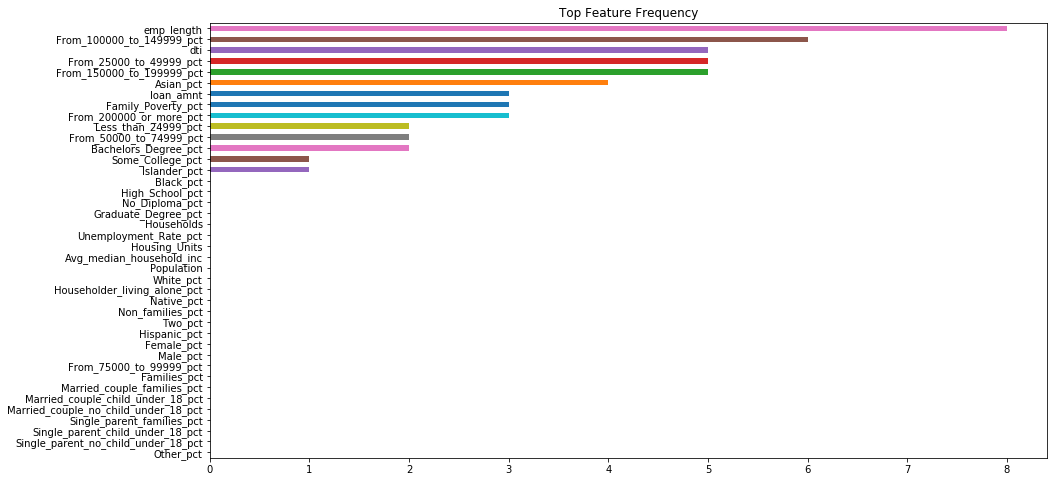

In [35]:
#top features for random forest trees
plt.figure(figsize=(15,8))
top_feature_count_df['Top Feature Count'].sort_values().plot(kind="barh")
plt.title("Top Feature Frequency")

plt.show()

In [39]:
#remove 1 of each of the demographic groups to avoid perfect colinearity
#e.g. Male_pct + Female_pct = 1
#leave 'int_rate' out as the response
ols_predictors_int_rate = ['loan_amnt',
 'term',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'dti',
 'Population',
 'Households',
 'No_Diploma_pct',
 'High_School_pct',
 'Some_College_pct',
 'Bachelors_Degree_pct',
 'Graduate_Degree_pct',
 'Family_Poverty_pct',
 'Unemployment_Rate_pct',
 'Housing_Units',
 'White_pct',
 'Black_pct',
 'Native_pct',
 'Asian_pct',
 'Islander_pct',
 'Two_pct',
 'Hispanic_pct',
 'Male_pct',
 'From_25000_to_49999_pct',
 'From_50000_to_74999_pct',
 'From_75000_to_99999_pct',
 'From_100000_to_149999_pct',
 'From_150000_to_199999_pct',
 'From_200000_or_more_pct',
 'Married_couple_families_pct',
 'Married_couple_child_under_18_pct',
 'Single_parent_families_pct',
 'Single_parent_child_under_18_pct']

In [37]:
accepted_joined_df.dtypes

loan_amnt                                float64
term                                      object
int_rate                                 float64
installment                              float64
grade                                     object
emp_length                               float64
home_ownership                            object
annual_inc                               float64
verification_status                       object
Zip                                       object
dti                                      float64
accepted                                   int64
Population                               float64
White                                    float64
Black                                    float64
Native                                   float64
Asian                                    float64
Islander                                 float64
Other                                    float64
Two                                      float64
Hispanic            